## Following the USGS documentation for `classes`

https://code.usgs.gov/ghsc/esi/libcomcat-python/-/blob/main/notebooks/Classes.ipynb

In [1]:
%matplotlib inline

In [2]:
from datetime import datetime
import io

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from libcomcat.search import get_event_by_id, search

In [4]:
datetime(1994, 1, 17, 12, 30)

datetime.datetime(1994, 1, 17, 12, 30)

In [42]:
earthquake = search(starttime=datetime(1994, 1, 1, 12, 30), endtime=datetime(1994, 1, 31, 12, 35),
                   minlatitude=33.5, maxlatitude=34.5, minlongitude=-118.600, maxlongitude=-117.500,
                   orderby='magnitude', limit=1)

In [43]:
earthquake

[ci3139684 1994-01-09 23:00:59.180000 (33.987,-118.505) 5.7 km M3.7,
 ci3144585 1994-01-17 12:30:55.390000 (34.213,-118.537) 18.2 km M6.7,
 ci3147406 1994-01-29 11:20:35.970000 (34.306,-118.579) 0.6 km M5.1]

In [44]:
print(f'earthquake.id: {earthquake[0].id}')
print(f'earthquake.time: {earthquake[0].time}')
print(f'earthquake.magnitude: {earthquake[0].magnitude}')
print(f'earthquake.depth: {earthquake[0].depth}')

earthquake.id: ci3139684
earthquake.time: 1994-01-09 23:00:59.180000
earthquake.magnitude: 3.71
earthquake.depth: 5.719


### SummaryEvent class methods

In [45]:
 ## Check for product
product = earthquake[1].hasProduct('shakemap')
print('Includes "shakemap" as a product: %s' % product)

## Check for property
prop = earthquake[1].hasProperty('station')
print('Includes "station" as a property: %s' % prop)

## Get URL
url = earthquake[1].getDetailURL()
print('Event URL: %s' % url)

## Get DetailEvent
detail = earthquake[1].getDetailEvent()
print('DetailEvent: %s' % detail)

## Get dictionary
event_dict = earthquake[1].toDict()
print('Event Dictionary: %s' % event_dict)

Includes "shakemap" as a product: True
Includes "station" as a property: False
Event URL: https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci3144585&format=geojson
DetailEvent: ci3144585 1994-01-17 12:30:55.390000 (34.213,-118.537) 18.2 km M6.7
Event Dictionary: OrderedDict([('id', 'ci3144585'), ('time', datetime.datetime(1994, 1, 17, 12, 30, 55, 390000)), ('location', '1km NNW of Reseda, CA'), ('latitude', 34.213), ('longitude', -118.537), ('depth', 18.202), ('magnitude', 6.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/ci3144585'), ('eventtype', 'earthquake'), ('significance', 1561)])


### DetailEvent properties

In [46]:
ci3144585 = get_event_by_id('ci3144585');
print("The products in for the event, '%s', include: %s" %
     (ci3144585.id, ci3144585.products))

The products in for the event, 'ci3144585', include: ['associate', 'dyfi', 'focal-mechanism', 'general-link', 'ground-failure', 'impact-text', 'nearby-cities', 'origin', 'phase-data', 'shakemap', 'trump-shakemap']


### DetailEvent class methods

In [47]:
## Get 'preferred' phase-data product for the 'preferred' source
preferred_product = ci3144585.getProducts('phase-data')
print('Preferred product: %s\nThis always returns one product.' % preferred_product)

## Get 'preferred' phase-data product for 'all' sources
all_product = ci3144585.getProducts('phase-data', source='all')
print('Preferred version with all sources returns %s products: %s\n' % 
      (len(all_product), all_product))

## Get 'last' phase-data product for 'all' sources
last_product = ci3144585.getProducts('phase-data', source='us', version='first')
print('Last version with us sources returns %s products: %s\n' % 
      (len(last_product), last_product))

## Get the number of versions of the phase-data product
num_versions = ci3144585.getNumVersions('phase-data')
print('There are %s versions.' % num_versions)

Preferred product: [Product phase-data from ci updated 2016-04-02 08:37:01.510000 containing 2 content files.]
This always returns one product.
Preferred version with all sources returns 2 products: [Product phase-data from ci updated 2016-04-02 08:37:01.510000 containing 2 content files., Product phase-data from us updated 2014-11-07 00:54:47.324000 containing 2 content files.]

Last version with us sources returns 1 products: [Product phase-data from us updated 2014-11-07 00:54:47.324000 containing 2 content files.]

There are 2 versions.


### Product

In [48]:
product = ci3144585.getProducts('shakemap')[0]

## list the product properties
for prop in product.properties:
    print('%s: %s' % (prop, product[prop]))

depth: 18.2
event-description: ShakeMap Atlas v4
event-type: ACTUAL
eventsource: ci
eventsourcecode: 3144585
eventtime: 1994-01-17T12:30:55.000Z
gmice: WGRW12
latitude: 34.2130
longitude: -118.5370
magnitude: 6.7
map-status: automatic
maximum-latitude: 37.717
maximum-longitude: -114.117
maxmmi: 8.794
maxmmi-grid: 8.794
maxpga: 0.868
maxpga-grid: 0.868
maxpgv: 4.64
maxpgv-grid: 4.64
maxpsa03: 1.705
maxpsa03-grid: 1.705
maxpsa10: 1.261
maxpsa10-grid: 1.261
maxpsa30: 0.335
maxpsa30-grid: 0.335
minimum-latitude: 30.7
minimum-longitude: -122.617
original-signature: MC0CFQCB61cLUB2lRWvK2JYEhIOarSi3XQIUEpkmDG8Ou2Eb6Jus9qUxwcApaIw=
original-signature-version: v1
pdl-client-version: Version 2.4.0 2020-05-11
process-timestamp: 2020-06-03T00:39:44Z
review-status: automatic
shakemap-code-version: 4.0.2+335.gcbad862
version: 1


### Product class methods

In [49]:
## list content
print('Shakemap Contents: %s' % product.contents)

Shakemap Contents: ['download/coverage_psa3p0_high_res.covjson', 'download/coverage_psa3p0_medium_res.covjson', 'download/coverage_pgv_high_res.covjson', 'download/mmi_legend.png', 'download/rupture.json', 'download/info.json', 'download/coverage_psa0p3_high_res.covjson', 'download/psa3p0.jpg', 'download/cont_psa0p3.json', 'download/coverage_pga_high_res.covjson', 'download/coverage_psa0p3_low_res.covjson', 'download/attenuation_curves.json', 'download/intensity.jpg', 'download/raster.zip', 'download/pga.pdf', 'download/pga_regr.png', 'download/coverage_mmi_low_res.covjson', 'download/coverage_mmi_high_res.covjson', 'download/intensity.pdf', 'download/mmi_regr.png', 'download/psa3p0.pdf', 'download/coverage_psa1p0_high_res.covjson', 'download/uncertainty.xml', 'download/pin-thumbnail.png', 'download/cont_mmi.json', 'download/coverage_pgv_low_res.covjson', 'download/coverage_mmi_medium_res.covjson', 'download/pgv.pdf', 'contents.xml', 'download/cont_psa1p0.json', 'download/cont_psa3p0.j

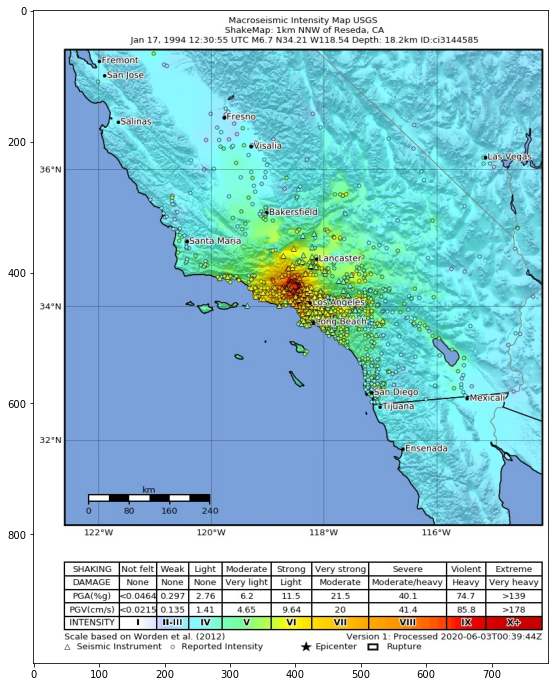

In [50]:
## Get the intensity image
## (use getContent('intensity.jpg', 'intensity.jpg') to save a local file)
img = product.getContentBytes('intensity.jpg')[0]

image = Image.open(io.BytesIO(img))

plt.figure(figsize=(10, 12))
plt.imshow(np.asarray(image))
plt.show()